### Exercise 1 : Two layer percepton
Create a two layer perception to determine the boundary limits of a surface given a distribution of samples from two classes.

Given a set of training samples from class A and another set from class B the MLP should be able to determine where elements from class A and B are located in a given space.

In [8]:
from models.initializations_functions import normal
from create_data import create_data
from models import hopfield_network
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from models import mlp_model
import numpy as np
import pandas as pd
import matplotlib
import itertools
import random
import os

Initialize parameters to create data distribution. The two classes will be distribtued along a grid. Each class will be generated from a gaussian distribution A and B with its own mean and sigma parameters.

In [9]:
p = 2 # num clases
n = 100 # num samples

# Gaussian parameters
mA= [1, 0.3]
sigmaA=0.2
mB= [0, -0.1]
sigmaB=0.3

# Paramters training
train_perc = 0.75

Create data, set plot == True to see the distribution

In [10]:
x_train, y_train, x_test, y_test = create_data(p, n, mA, sigmaA, mB, sigmaB, train_perc, plot=False)

Set parameters for the MLP training. In this example a hyperparameter search has been displayed to find the best model to decide the decision boundary.

In [11]:
save_path = os.getcwd() + '\\save_models\\mlp_model'
epoch = 1000
early_stopping = 0.0001
param_dict = {"learning_rate": [0.01, 0.001, 0.1],
              "hidden_nodes": [4, 18, 32],
              "mean_initialization" :  [0, 0.1,-0.1],
              "std_initialization":[0.4, 0.3, 0.5]}

Extract 10 random combinations from the hyperparameter dicitonary

In [12]:
keys, values = zip(*param_dict.items())
permutations_dicts = [dict(zip(keys, v)) for v in itertools.product(*values)]
random.shuffle(permutations_dicts)
permutations_dicts = permutations_dicts[:10]

Use the library MLP to create and two layer percepton to determine the decision boundaries of the grid.
1. The MLP uses an early stopping strategy to stop the learning whe the improvement after ten consecutive epochs is not higher than the early stopping parameter.
2. The weights of the model with the lowest mean square error are saved in a csv file.
3. This network only present two layers and is trained with a little number of sampled. Therefore, a batch size to feed the network is not implemented due to the task is easy and fast.
4. A picture with the train and test data, as well as the decision boundaries will be displayed each time a model with a lower mse error than the previous one is generated.

num of hidden nodes 32, lr 0.01
stop because early stopping at epoch 96 with error 0.4577349861600987, improvement from previous error 9.138229545313514e-05


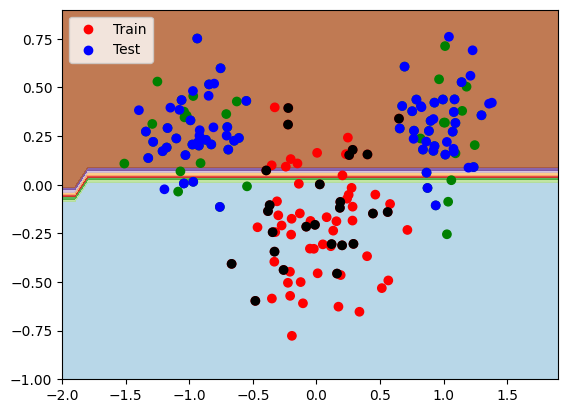

num of hidden nodes 4, lr 0.01
stop because early stopping at epoch 102 with error 0.4614993825986453, improvement from previous error 6.16337659360422e-05
num of hidden nodes 4, lr 0.001
stop because early stopping at epoch 705 with error 0.4645795589684688, improvement from previous error 9.586940187961135e-05
num of hidden nodes 32, lr 0.1
stop because early stopping at epoch 125 with error 0.027994615061977406, improvement from previous error 9.455631809951459e-05


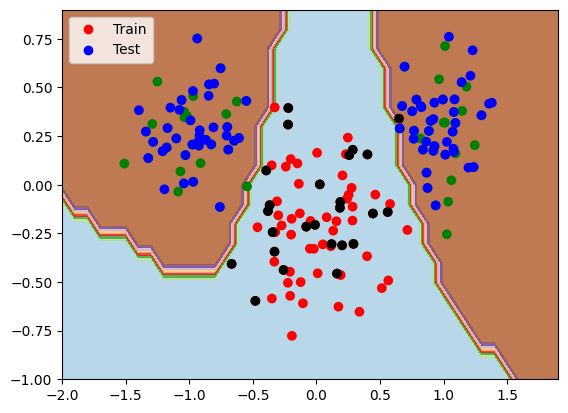

num of hidden nodes 4, lr 0.1
stop because early stopping at epoch 128 with error 0.02798112199506709, improvement from previous error 9.074308286145111e-05


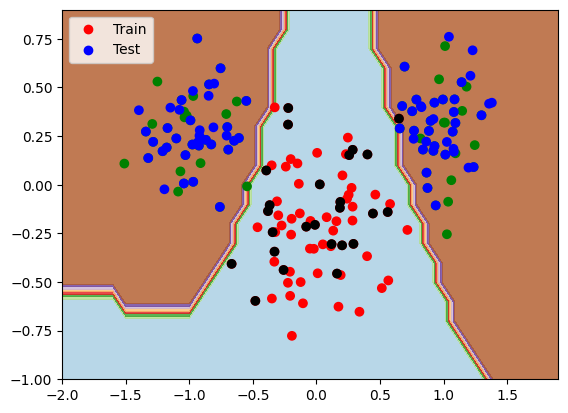

num of hidden nodes 18, lr 0.1
stop because early stopping at epoch 142 with error 0.02818410062792298, improvement from previous error 9.317090524851857e-05
num of hidden nodes 32, lr 0.01
stop because early stopping at epoch 366 with error 0.04788667071683014, improvement from previous error 9.161754115680903e-05
num of hidden nodes 18, lr 0.01
stop because early stopping at epoch 510 with error 0.05370245564012815, improvement from previous error 9.39883712826814e-05
num of hidden nodes 18, lr 0.01
stop because early stopping at epoch 370 with error 0.050172452247250414, improvement from previous error 9.270989392766438e-05
num of hidden nodes 18, lr 0.1
stop because early stopping at epoch 154 with error 0.029910202566398293, improvement from previous error 9.273683664946103e-05
best model =  model index 4


In [13]:
df = pd.DataFrame()
error = 10

for ind,hp in enumerate(permutations_dicts):

    # Create model class
    mlp = mlp_model.MLP(input=x_train, hidden_nodes=hp['hidden_nodes'], out=1, initialization=normal(hp['mean_initialization'],hp['std_initialization']), learning_rate=hp['learning_rate'])

    # Train model
    oin, error_list = mlp.backprop(y_train, epochs=epoch, early_stopping=early_stopping)

    # Keep parameters in csv file
    df_now = pd.DataFrame([hp['learning_rate'],hp['hidden_nodes'],hp['mean_initialization'], hp['std_initialization'], error_list[-1]])
    df = pd.concat([df,df_now.T])

    # Save best model
    if error > error_list[-1]:
        mlp.plot_decision_boundary(y_train,x_test, y_test)
        df_now.to_csv(save_path + '_best_hyperparameters.csv')
        mlp.save_weights(save_path)
        error = error_list[-1]
        best_model_ind = ind

    mlp.reset()

df.columns = ['lr', 'hn', 'mu_ini', 'std_ini', 'mse']
df.to_csv(save_path + '_hyperparameters.csv')

print('best model = ', f'model index {best_model_ind}')


### Exercise 2: Hopfield Network
Create a Hopfield and evaluate its performance.
1. Check whether its input patterns are saved as fixed points


In [14]:
train_pat = np.array([[-1, -1, 1, -1, 1, -1, -1, 1],
                           [-1, -1, -1, -1, -1, 1, -1, -1],
                           [-1, 1, 1, -1, -1, 1, -1, 1]])

# 1. Check if the patterns are stored in the network
model = hopfield_network.HopfieldNetwork()
model.train(train_pat)

3  patterns memorized


3

2. What happens if the test patterns to feed into the network are affected by noise? Is the network capable to find th fix points?

In [15]:
 # 2. Check whether is possible to find distorted patterns from the stored patterns
dist_pat = np.array([[1, -1, 1, -1, 1, -1, -1, 1],
                     [1, 1, -1, -1, -1, 1, -1, -1],
                     [1, 1, 1, -1, -1, 1, -1, 1]])


print("Synchronous")
for ind, t_pat in enumerate(train_pat):
    d_pat = dist_pat[ind,:]
    model.test_recall(d_pat, t_pat, synchronous=True)

print("\nAsynchronous")
for ind, t_pat in enumerate(train_pat):
    d_pat = dist_pat[ind,:]
    model.test_recall(d_pat, t_pat, synchronous=False)

Synchronous
pat dist = [ 1 -1  1 -1  1 -1 -1  1], pat recall[-1. -1.  1. -1.  1. -1. -1.  1.]: Yay!
pat dist = [ 1  1 -1 -1 -1  1 -1 -1], pat recall[-1.  1. -1. -1. -1.  1. -1. -1.]: Bad
pat dist = [ 1  1  1 -1 -1  1 -1  1], pat recall[-1.  1.  1. -1. -1.  1. -1.  1.]: Yay!

Asynchronous
pat dist = [ 1 -1  1 -1  1 -1 -1  1], pat recall[-1 -1  1 -1  1 -1 -1  1]: Yay!
pat dist = [ 1  1 -1 -1 -1  1 -1 -1], pat recall[-1  1 -1 -1 -1  1 -1 -1]: Bad
pat dist = [ 1  1  1 -1 -1  1 -1  1], pat recall[-1  1  1 -1 -1  1 -1  1]: Yay!
